# Monte Carlo example

In [1]:
# Add PyTwoWay to system path, do not run this
import sys
sys.path.append('../../..')
sys.path.append('../../../../bipartitepandas')

In [2]:
# Import the PyTwoWay package 
# (Make sure you have installed it using pip install pytwoway)
import pytwoway as tw
import bipartitepandas as bpd
import numpy as np

## First, check out parameter options

In [3]:
print('----- Simulation -----')
bpd.sim_params().describe_all()
print('----- FE -----')
tw.fe_params().describe_all()
print('----- CRE -----')
tw.cre_params().describe_all()
print('----- Clustering -----')
bpd.cluster_params().describe_all()
print('----- Cleaning -----')
bpd.clean_params().describe_all()

----- Simulation -----
KEY: 'num_ind'
CURRENT VALUE: 10000
VALID VALUES: one of type <class 'int'>
DESCRIPTION: 
            (default=10000) Number of workers.
        
KEY: 'num_time'
CURRENT VALUE: 5
VALID VALUES: one of type <class 'int'>
DESCRIPTION: 
            (default=5) Time length of panel.
        
KEY: 'firm_size'
CURRENT VALUE: 50
VALID VALUES: one of type <class 'int'>
DESCRIPTION: 
            (default=50) Maximum number of individuals per firm.
        
KEY: 'nk'
CURRENT VALUE: 10
VALID VALUES: one of type <class 'int'>
DESCRIPTION: 
            (default=10) Number of firm types.
        
KEY: 'nl'
CURRENT VALUE: 5
VALID VALUES: one of type <class 'int'>
DESCRIPTION: 
            (default=5) Number of worker types.
        
KEY: 'alpha_sig'
CURRENT VALUE: 1
VALID VALUES: one of type (<class 'float'>, <class 'int'>)
DESCRIPTION: 
            (default=1) Standard error of individual fixed effect (volatility of worker effects).
        
KEY: 'psi_sig'
CURRENT VALUE: 1
VALI

## Second, set parameter choices

In [4]:
# Set parameters
sim_params = bpd.sim_params({'num_ind': 1000, 'firm_size': 5, 'alpha_sig': 2, 'w_sig': 2, 'csort': 1.5, 'cnetw': 1.5, 'p_move': 0.05})
fe_params = tw.fe_params({'he': True, 'lev_threshold_obs': 1, 'weighted': True})
cre_params = tw.cre_params()
cluster_params = bpd.cluster_params()
clean_params = bpd.clean_params()

## Third, run the Monte Carlo simulation using the parameter choices

In [5]:
# Create the TwoWayMonteCarlo object
twmc_net = tw.TwoWayMonteCarlo(
    sim_params=sim_params,
    fe_params=fe_params,
    cre_params=cre_params,
    cluster_params=cluster_params,
    clean_params=clean_params,
    collapse=True, # If True, run estimators on data collapsed at the worker-firm spell level
    move_to_worker=False, # If True, each move is treated as a new worker
    log=False # If True, will create log file(s)
)
# Run the Monte Carlo estimation
twmc_net.twfe_monte_carlo(
    N=100, # Number of simulations
    ncore=4, # Number of cores to use
    rng=np.random.default_rng(1234) # NumPy random number generator. This overrides the random number generators for simulating, FE, and CRE.
)

  0%|                                                   | 0/100 [00:00<?, ?it/s]/Users/adamalexanderoppenheimer/opt/anaconda3/envs/bpd-env/lib/python3.7/site-packages/pyamg/multilevel.py:622: DeprecationWarning: scipy.linalg.pinv2 is deprecated since SciPy 1.7.0, use scipy.linalg.pinv instead
  self.P = getattr(sp.linalg, solver)(A.toarray(), **kwargs)
  0%|                                                     | 0/5 [00:00<?, ?it/s]/Users/adamalexanderoppenheimer/opt/anaconda3/envs/bpd-env/lib/python3.7/site-packages/pyamg/multilevel.py:622: DeprecationWarning: scipy.linalg.pinv2 is deprecated since SciPy 1.7.0, use scipy.linalg.pinv instead
  self.P = getattr(sp.linalg, solver)(A.toarray(), **kwargs)
/Users/adamalexanderoppenheimer/opt/anaconda3/envs/bpd-env/lib/python3.7/site-packages/pyamg/multilevel.py:622: DeprecationWarning: scipy.linalg.pinv2 is deprecated since SciPy 1.7.0, use scipy.linalg.pinv instead
  self.P = getattr(sp.linalg, solver)(A.toarray(), **kwargs)
100%|██████████

  8%|███▍                                       | 8/100 [00:10<01:27,  1.05it/s]/Users/adamalexanderoppenheimer/opt/anaconda3/envs/bpd-env/lib/python3.7/site-packages/pyamg/multilevel.py:622: DeprecationWarning: scipy.linalg.pinv2 is deprecated since SciPy 1.7.0, use scipy.linalg.pinv instead
  self.P = getattr(sp.linalg, solver)(A.toarray(), **kwargs)
100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 161.47it/s]
../../../pytwoway/fe.py:1114: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 10 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 4 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
  9%|███▊                                       | 9/100 [00:12<01:49,  1.20s/it]../../../pytwoway/fe.py:1114: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 10 batch(es) being drawn. After exhausting 

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 117.61it/s]
/Users/adamalexanderoppenheimer/opt/anaconda3/envs/bpd-env/lib/python3.7/site-packages/pyamg/multilevel.py:622: DeprecationWarning: scipy.linalg.pinv2 is deprecated since SciPy 1.7.0, use scipy.linalg.pinv instead
  self.P = getattr(sp.linalg, solver)(A.toarray(), **kwargs)
100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 72.36it/s]
../../../pytwoway/fe.py:1114: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 10 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 6 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 91.12it/s]
../../../pytwoway/fe.py:1114: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 10 batch(es) being drawn. After exhaustin

  0%|                                                     | 0/5 [00:00<?, ?it/s]/Users/adamalexanderoppenheimer/opt/anaconda3/envs/bpd-env/lib/python3.7/site-packages/pyamg/multilevel.py:622: DeprecationWarning: scipy.linalg.pinv2 is deprecated since SciPy 1.7.0, use scipy.linalg.pinv instead
  self.P = getattr(sp.linalg, solver)(A.toarray(), **kwargs)
  0%|                                                     | 0/5 [00:00<?, ?it/s]/Users/adamalexanderoppenheimer/opt/anaconda3/envs/bpd-env/lib/python3.7/site-packages/pyamg/multilevel.py:622: DeprecationWarning: scipy.linalg.pinv2 is deprecated since SciPy 1.7.0, use scipy.linalg.pinv instead
  self.P = getattr(sp.linalg, solver)(A.toarray(), **kwargs)
100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 162.27it/s]
../../../pytwoway/fe.py:1114: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 10 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 137.73it/s]
../../../pytwoway/fe.py:1114: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 10 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 6 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 85.70it/s]
../../../pytwoway/fe.py:1114: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 10 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 5 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 58.73it/s]
../../../pytwoway/fe.py:1114: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a max

100%|████████████████████████████████████████████| 5/5 [00:00<00:00, 100.81it/s]
/Users/adamalexanderoppenheimer/opt/anaconda3/envs/bpd-env/lib/python3.7/site-packages/pyamg/multilevel.py:622: DeprecationWarning: scipy.linalg.pinv2 is deprecated since SciPy 1.7.0, use scipy.linalg.pinv instead
  self.P = getattr(sp.linalg, solver)(A.toarray(), **kwargs)
  0%|                                                     | 0/5 [00:00<?, ?it/s]../../../pytwoway/fe.py:1114: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 10 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 3 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 63.10it/s]
/Users/adamalexanderoppenheimer/opt/anaconda3/envs/bpd-env/lib/python3.7/site-packages/pyamg/multilevel.py:622: DeprecationWarning: scipy.linalg.pinv2 is depre

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 87.33it/s]
../../../pytwoway/fe.py:1114: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 10 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 4 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 72.57it/s]
../../../pytwoway/fe.py:1114: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 10 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 4 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 36.00it/s]
/Users/adamalexanderoppenheimer/opt/anaconda3/envs/bpd-env/lib/python3.7/site-packages/pyamg/multilevel.py:62

 63%|██████████████████████████▍               | 63/100 [01:23<00:56,  1.52s/it]/Users/adamalexanderoppenheimer/opt/anaconda3/envs/bpd-env/lib/python3.7/site-packages/pyamg/multilevel.py:622: DeprecationWarning: scipy.linalg.pinv2 is deprecated since SciPy 1.7.0, use scipy.linalg.pinv instead
  self.P = getattr(sp.linalg, solver)(A.toarray(), **kwargs)
100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 65.13it/s]
../../../pytwoway/fe.py:1114: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 10 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 2 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
 64%|██████████████████████████▉               | 64/100 [01:25<00:58,  1.64s/it]/Users/adamalexanderoppenheimer/opt/anaconda3/envs/bpd-env/lib/python3.7/site-packages/pyamg/multilevel.py:622: DeprecationWarning: scipy.linalg.pinv2 is deprec

 72%|██████████████████████████████▏           | 72/100 [01:36<00:35,  1.28s/it]/Users/adamalexanderoppenheimer/opt/anaconda3/envs/bpd-env/lib/python3.7/site-packages/pyamg/multilevel.py:622: DeprecationWarning: scipy.linalg.pinv2 is deprecated since SciPy 1.7.0, use scipy.linalg.pinv instead
  self.P = getattr(sp.linalg, solver)(A.toarray(), **kwargs)
100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 61.69it/s]
../../../pytwoway/fe.py:1114: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 10 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 4 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
 73%|██████████████████████████████▋           | 73/100 [01:39<00:45,  1.67s/it]../../../pytwoway/fe.py:1114: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 10 batch(es) being drawn. After exhausting 

100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 55.08it/s]
../../../pytwoway/fe.py:1114: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 10 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 3 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
100%|█████████████████████████████████████████████| 5/5 [00:00<00:00, 38.31it/s]
/Users/adamalexanderoppenheimer/opt/anaconda3/envs/bpd-env/lib/python3.7/site-packages/pyamg/multilevel.py:622: DeprecationWarning: scipy.linalg.pinv2 is deprecated since SciPy 1.7.0, use scipy.linalg.pinv instead
  self.P = getattr(sp.linalg, solver)(A.toarray(), **kwargs)
 81%|██████████████████████████████████        | 81/100 [01:53<00:37,  1.95s/it]/Users/adamalexanderoppenheimer/opt/anaconda3/envs/bpd-env/lib/python3.7/site-packages/pyamg/multilevel.py:622: DeprecationWarning: scipy.linalg.pinv2 is depre

 90%|█████████████████████████████████████▊    | 90/100 [02:05<00:16,  1.65s/it]/Users/adamalexanderoppenheimer/opt/anaconda3/envs/bpd-env/lib/python3.7/site-packages/pyamg/multilevel.py:622: DeprecationWarning: scipy.linalg.pinv2 is deprecated since SciPy 1.7.0, use scipy.linalg.pinv instead
  self.P = getattr(sp.linalg, solver)(A.toarray(), **kwargs)
../../../pytwoway/fe.py:1114: UserWarning: Threshold for max Pii is 0.98, with 50 draw(s) per batch and a maximum of 10 batch(es) being drawn. After exhausting the maximum number of batches, there is/are still 5 draw(s) with Pii above this threshold. These will be recomputed analytically.
  warnings.warn(leverage_warning)
 91%|██████████████████████████████████████▏   | 91/100 [02:06<00:13,  1.45s/it]/Users/adamalexanderoppenheimer/opt/anaconda3/envs/bpd-env/lib/python3.7/site-packages/pyamg/multilevel.py:622: DeprecationWarning: scipy.linalg.pinv2 is deprecated since SciPy 1.7.0, use scipy.linalg.pinv instead
  self.P = getattr(sp.linal

## Finally, plot parameter estimates (plots show the difference from the truth)

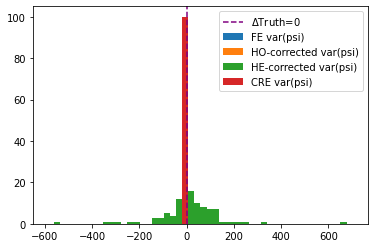

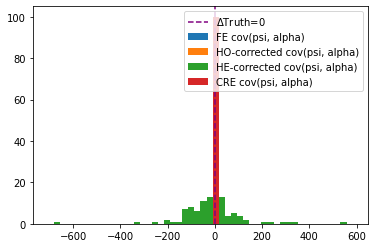

In [6]:
twmc_net.plot_monte_carlo(he=True)

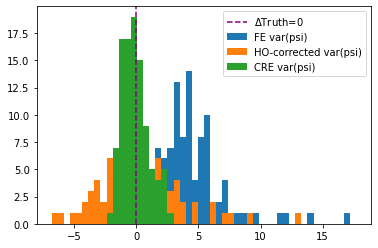

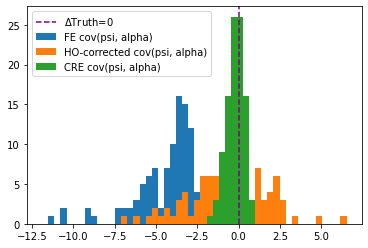

In [7]:
twmc_net.plot_monte_carlo(he=False)